## Biodiversity in US National Parks

This is an open Codecademy exercise aiming to load, clean and visualize data covering biodiversity in US national parks. Let's peek into provided data.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

print(species.head())
print(species.shape)

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
(5824, 4)


In [4]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


### First table
Let's dive deeper into species data.

In [6]:
print(species.shape)
print(species.columns)
print(species.isna().sum())

(5824, 4)
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


In [7]:
print(f"There're {species.conservation_status.nunique()} unique values in Conservation status column. These: {species.conservation_status.unique()}")
print(f"There're {species.category.nunique()} unique values in Category column. These: {species.category.unique()}")

There're 4 unique values in Conservation status column. These: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
There're 7 unique values in Category column. These: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


There're actually *five* unique values in Conservation status column. Let's treat missing values as "No Conservation" 

In [9]:
species.conservation_status = species.conservation_status.fillna("No Conservation")
print(f"There're {species.conservation_status.nunique()} unique values in Conservation status column. These: {species.conservation_status.unique()}")

There're 5 unique values in Conservation status column. These: ['No Conservation' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


## First partial question
We may be interested in seeing what is the distribution of species classes in the national parks, which classes are most endangered and on what level of protection.

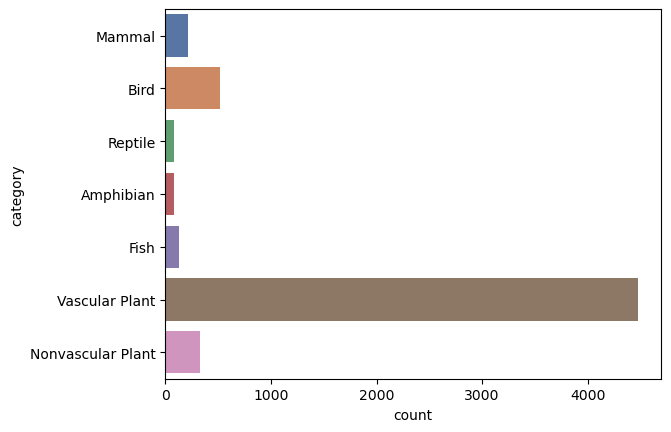

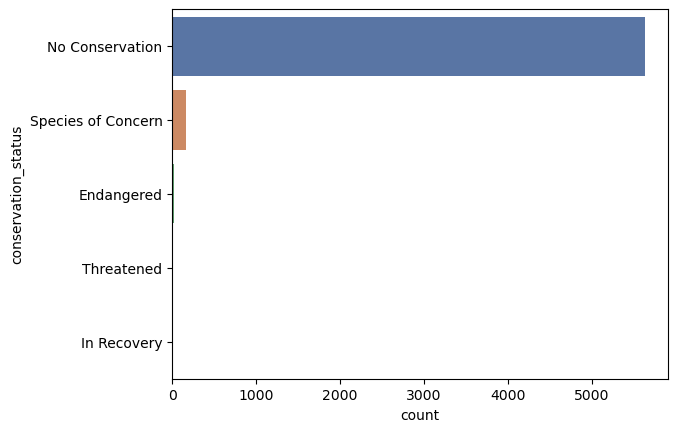

In [11]:
sns.countplot(y=species.category, data=species, hue="category", palette="deep")
plt.show()
sns.countplot(y=species.conservation_status, data=species, hue="conservation_status", palette="deep")
plt.show()

Dramatic majority of species have no conversation status. Let's have one more dataset with some status only.

In [13]:
species_cons = species[species.conservation_status != "No Conservation"].copy()
print(species_cons.shape)

(191, 4)


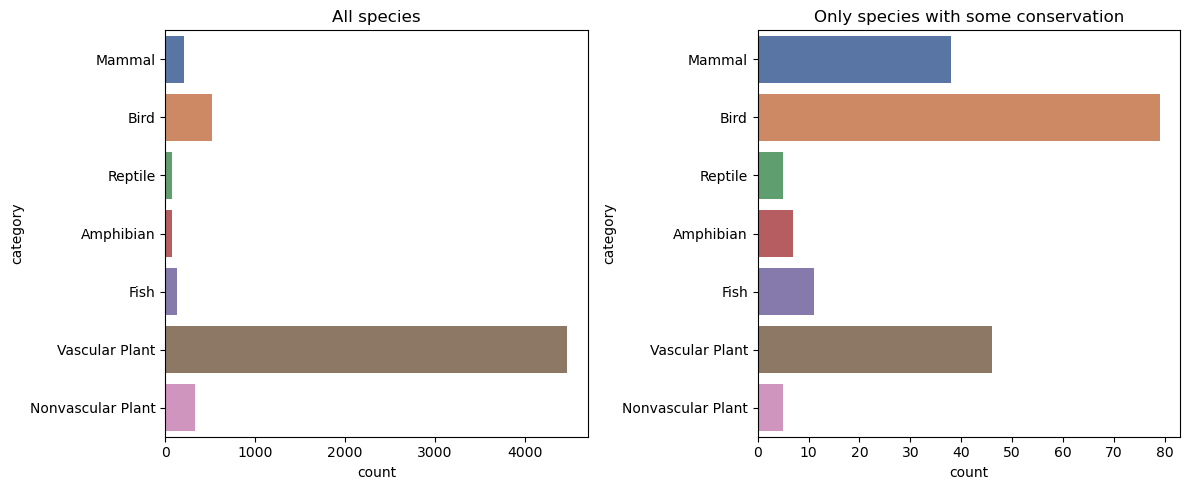

In [14]:
def compare_plots(data1, data2, column, hue, title1=None, title2=None):

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(y=data1[column], data=data1, hue=column, palette="deep")
    plt.title(title1)

    plt.subplot(1, 2, 2)
    sns.countplot(y=data2[column], data=data2, hue=column, palette="deep")
    plt.title(title2)

    plt.tight_layout()
    plt.show()

compare_plots(species, species_cons, "category", "category", "All species", "Only species with some conservation")

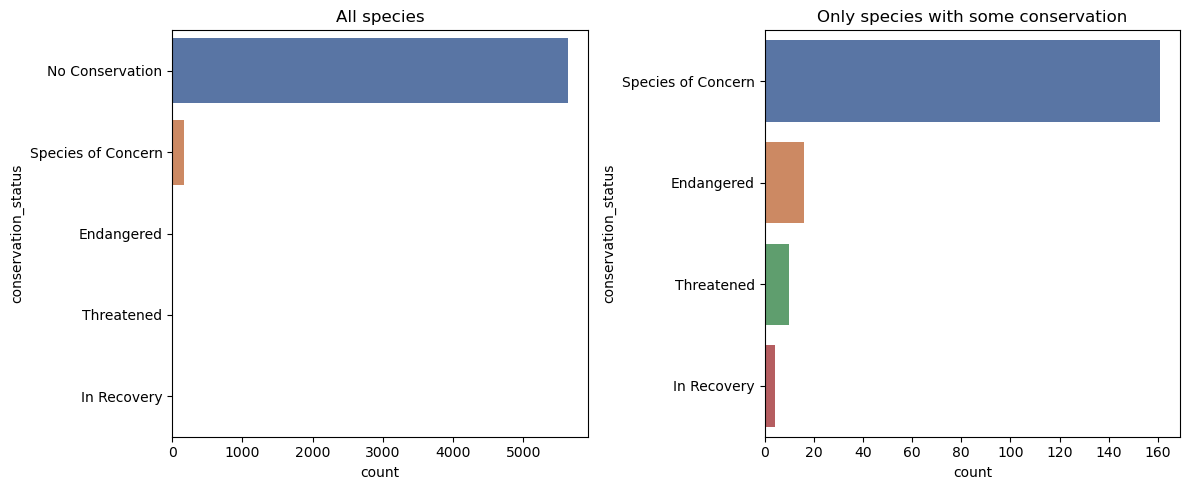

In [15]:
compare_plots(species, species_cons, "conservation_status", "conservation_status", "All species", "Only species with some conservation")

Let's see one more distribution

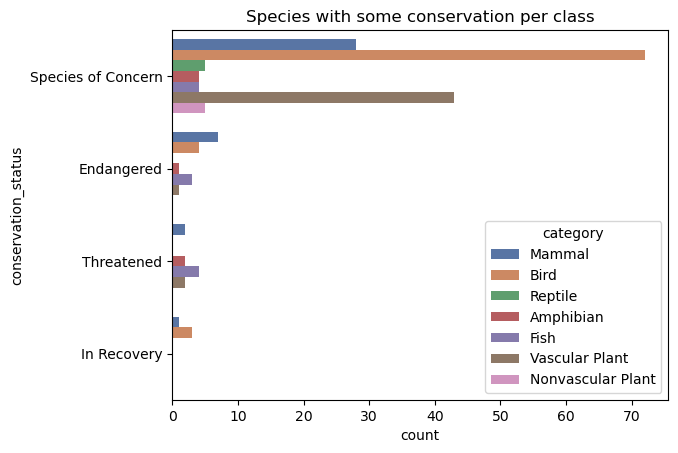

In [17]:
sns.countplot(y=species_cons.conservation_status, data=species_cons, hue="category", palette="deep")
plt.title("Species with some conservation per class")
plt.show()

## First partial conclusion

* Even though most of the organisms logged in our data are vasculat plant (in about 9:1 ratio to other species), majority of these have no conservation status.
* When we reduce the scope to include only species that have at least some conservation status, we see these are dominated by birds with vascular plants and mammals on 2nd and 3rd places.
* However, at a more granular level we can see these three have the lowest conservation level ("species of concern") – with birds actually being on top in "In Recovery" category
* When we focus on the higher status ("endangered" and "threatened"), suddenly we observe it is fish that are threatened most.



### Second table

In [20]:
print(observations.head)
print(observations.shape)
print(observations.columns)

<bound method NDFrame.head of                                scientific_name  \
0                           Vicia benghalensis   
1                               Neovison vison   
2                            Prunus subcordata   
3                         Abutilon theophrasti   
4                     Githopsis specularioides   
...                                        ...   
23291                     Croton monanthogynus   
23292                 Otospermophilus beecheyi   
23293  Heterotheca sessiliflora ssp. echioides   
23294                     Dicranella rufescens   
23295                           Cucurbita pepo   

                                 park_name  observations  
0      Great Smoky Mountains National Park            68  
1      Great Smoky Mountains National Park            77  
2                   Yosemite National Park           138  
3                      Bryce National Park            84  
4      Great Smoky Mountains National Park            85  
...            

In [21]:
print(observations.park_name.value_counts())

park_name
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: count, dtype: int64


In [22]:
print(f"How many species in Observations table? {observations.scientific_name.nunique()}")
print(f"How many species in Species table? {species.scientific_name.nunique()}")

How many species in Observations table? 5541
How many species in Species table? 5541


It's suggestive to join the tables on the scientific_names column. Let's do it.

In [24]:
df = species.merge(observations, on="scientific_name")

In [25]:
print(df.head)

<bound method NDFrame.head of              category                scientific_name  \
0              Mammal  Clethrionomys gapperi gapperi   
1              Mammal  Clethrionomys gapperi gapperi   
2              Mammal  Clethrionomys gapperi gapperi   
3              Mammal  Clethrionomys gapperi gapperi   
4              Mammal                      Bos bison   
...               ...                            ...   
25627  Vascular Plant              Vitis californica   
25628  Vascular Plant            Tribulus terrestris   
25629  Vascular Plant            Tribulus terrestris   
25630  Vascular Plant            Tribulus terrestris   
25631  Vascular Plant            Tribulus terrestris   

                                            common_names conservation_status  \
0                               Gapper's Red-Backed Vole     No Conservation   
1                               Gapper's Red-Backed Vole     No Conservation   
2                               Gapper's Red-Backed Vole 

In [26]:
print(species[species.scientific_name == "Clethrionomys gapperi gapperi"])

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   

  conservation_status  
0     No Conservation  


In [27]:
print(observations[observations.scientific_name == "Clethrionomys gapperi gapperi"])

                     scientific_name                            park_name  \
2891   Clethrionomys gapperi gapperi                  Bryce National Park   
11470  Clethrionomys gapperi gapperi            Yellowstone National Park   
14373  Clethrionomys gapperi gapperi  Great Smoky Mountains National Park   
21776  Clethrionomys gapperi gapperi               Yosemite National Park   

       observations  
2891            130  
11470           270  
14373            98  
21776           117  


In [28]:
print(df[df.scientific_name == "Clethrionomys gapperi gapperi"])

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   

  conservation_status                            park_name  observations  
0     No Conservation                  Bryce National Park           130  
1     No Conservation            Yellowstone National Park           270  
2     No Conservation  Great Smoky Mountains National Park            98  
3     No Conservation               Yosemite National Park           117  


## Analysis

We can pick a fancy animal and see its observations in various parks.
Also, we peek into nonvascular plants - mostly species of mosses and liveworths - and decide which park is most mossy.
### Which park homes most of a fancy animal species. Which one is most mossy?

In [30]:
print(df.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status',
       'park_name', 'observations'],
      dtype='object')


In [31]:
print(species["common_names"][species.category == "Mammal"])

0                                Gapper's Red-Backed Vole
1                                   American Bison, Bison
2       Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3       Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                           Wapiti Or Elk
                              ...                        
4499                                    Mount Lyell Shrew
4500                                        Montane Shrew
4501                                           Inyo Shrew
4502                                   Trowbridge's Shrew
4503                                    Broad-Footed Mole
Name: common_names, Length: 214, dtype: object


Let's go for bison.

In [33]:
print(species[species.common_names == "American Bison, Bison"])

  category scientific_name           common_names conservation_status
1   Mammal       Bos bison  American Bison, Bison     No Conservation


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/American_bison_k5680-1.jpg/220px-American_bison_k5680-1.jpg">

In [35]:
print(df[df.scientific_name == "Bos bison"])

  category scientific_name           common_names conservation_status  \
4   Mammal       Bos bison  American Bison, Bison     No Conservation   
5   Mammal       Bos bison  American Bison, Bison     No Conservation   
6   Mammal       Bos bison  American Bison, Bison     No Conservation   
7   Mammal       Bos bison  American Bison, Bison     No Conservation   

                             park_name  observations  
4               Yosemite National Park           128  
5            Yellowstone National Park           269  
6                  Bryce National Park            68  
7  Great Smoky Mountains National Park            77  


### Too easy. Bison's home is mostly in Yellowstone
How about mosses?

In [37]:
print(species["common_names"][species.category == "Nonvascular Plant"])

2679         Roth's Andreaea Moss
2680                Andreaea Moss
2681               Bartramia Moss
2682              Philonotis Moss
2683              Philonotis Moss
                  ...            
3007                     Sphagnum
3008                     Sphagnum
3009               Tetraphis Moss
3010    Brown's Tetrodontium Moss
4445              Fontinalis Moss
Name: common_names, Length: 333, dtype: object


In [69]:
number_of_mosses = 0
for category in df["category"].values:
    if category == "Nonvascular Plant":
        number_of_mosses += 1
print(number_of_mosses)

1332


In [67]:
print(df[df.category == "Nonvascular Plant"])

                category          scientific_name               common_names  \
11732  Nonvascular Plant          Andreaea rothii       Roth's Andreaea Moss   
11733  Nonvascular Plant          Andreaea rothii       Roth's Andreaea Moss   
11734  Nonvascular Plant          Andreaea rothii       Roth's Andreaea Moss   
11735  Nonvascular Plant          Andreaea rothii       Roth's Andreaea Moss   
11736  Nonvascular Plant       Andreaea rupestris              Andreaea Moss   
...                  ...                      ...                        ...   
13059  Nonvascular Plant  Tetrodontium brownianum  Brown's Tetrodontium Moss   
19664  Nonvascular Plant               Fontinalis            Fontinalis Moss   
19665  Nonvascular Plant               Fontinalis            Fontinalis Moss   
19666  Nonvascular Plant               Fontinalis            Fontinalis Moss   
19667  Nonvascular Plant               Fontinalis            Fontinalis Moss   

      conservation_status              

In [79]:
mosses = df[["park_name", "observations"]][df.category == "Nonvascular Plant"].copy()

In [81]:
print(mosses)

                                 park_name  observations
11732            Yellowstone National Park           276
11733                  Bryce National Park            93
11734  Great Smoky Mountains National Park           124
11735               Yosemite National Park           124
11736  Great Smoky Mountains National Park            62
...                                    ...           ...
13059            Yellowstone National Park           260
19664                  Bryce National Park           113
19665  Great Smoky Mountains National Park            62
19666            Yellowstone National Park           273
19667               Yosemite National Park           148

[1332 rows x 2 columns]


In [98]:
moss_summary = df.groupby('park_name')['observations'].sum().reset_index()
moss_summary = park_observations_summary.sort_values('observations', ascending=False)
print(moss_summary)

                             park_name  observations
2            Yellowstone National Park       1587641
3               Yosemite National Park        949452
0                  Bryce National Park        633291
1  Great Smoky Mountains National Park        474863


### Congrats to Yellowstone again, the most mossy park.